In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("vectorized.csv", index_col=0)

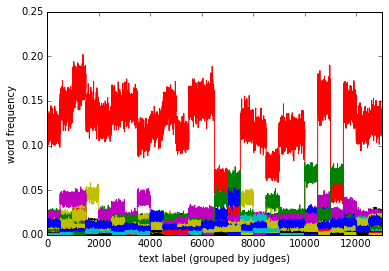

In [75]:
(data.iloc[:,1:]/3000).plot(legend = False)
plt.xlabel("text label (grouped by judges)")
plt.ylabel("word frequency")
plt.savefig("freq")

In [3]:
train_x = np.array(data.iloc[:,1:])
train_x = np.nan_to_num(train_x)
train_x = train_x/3000
train_y = np.array(data.iloc[:,0])

In [4]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import zero_one_loss

In [5]:
from sklearn.ensemble import *
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [86]:
result = []
parameter = (3,10,30,50,100,200,300)
for a in parameter:
    round = []
    for idx_train, idx_val in ShuffleSplit(train_y.shape[0], n_iter=5, test_size=0.2):
        clf = RandomForestClassifier(n_estimators=a, n_jobs=4)
        #clf = GaussianNB()
        clf.fit(train_x[idx_train], train_y[idx_train])
        g = clf.predict(train_x[idx_val])
        e_val = zero_one_loss(g, train_y[idx_val])
        round.append(e_val)
        print e_val
    result.append(round)
DFresult = pd.DataFrame(result)

0.0423076923077
0.0384615384615
0.0403846153846
0.0373076923077
0.0434615384615
0.0388461538462
0.0388461538462
0.04
0.0392307692308
0.035
0.0373076923077
0.0365384615385
0.0376923076923
0.035
0.0446153846154
0.0365384615385
0.0465384615385
0.0373076923077
0.0388461538462
0.0373076923077
0.0373076923077
0.0396153846154
0.0326923076923
0.0353846153846
0.035
0.0396153846154
0.0411538461538
0.0307692307692
0.0419230769231
0.0346153846154
0.0388461538462
0.0365384615385
0.0396153846154
0.04
0.0315384615385


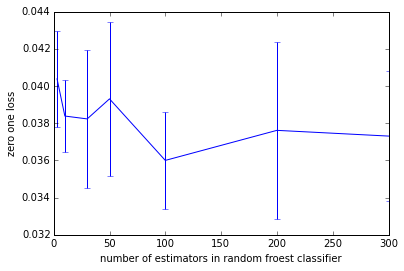

In [90]:
plt.errorbar(parameter, DFresult.T.mean(), yerr = DFresult.T.std())
plt.xlabel("number of estimators in random froest classifier")
plt.ylabel("zero one loss")
plt.savefig("random forester")

In [85]:
DFresult

,0,1,2,3,4,5,6,7,8,9
0,0.034615,0.043077,0.035000,0.041538,0.046538,0.036538,0.038846,0.049231,0.041923,0.046538
1,0.034615,0.036538,0.032308,0.040769,0.038846,0.036538,0.038462,0.035000,0.031154,0.035385
2,0.036154,0.041538,0.034231,0.038846,0.033846,0.033077,0.043462,0.041923,0.033462,0.036154
3,0.038462,0.036154,0.036923,0.033462,0.033846,0.040769,0.036538,0.039615,0.036538,0.038077
4,0.048077,0.041154,0.045769,0.035769,0.038077,0.036923,0.042308,0.042692,0.036923,0.035000
5,0.037692,0.032692,0.039231,0.038462,0.036538,0.035769,0.041154,0.037692,0.039231,0.033846


In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
result = []
parameter = (5,10,20,30,50)
for a in parameter:
    round = []
    for idx_train, idx_val in ShuffleSplit(train_y.shape[0], n_iter=10, test_size=0.2):
        clf = KNeighborsClassifier(n_neighbors=a, n_jobs=4)
        #clf = GaussianNB()
        clf.fit(train_x[idx_train], train_y[idx_train])
        g = clf.predict(train_x[idx_val])
        e_val = zero_one_loss(g, train_y[idx_val])
        round.append(e_val)
        print e_val
    result.append(round)
DFresult = pd.DataFrame(result)

0.0396153846154
0.0353846153846
0.0411538461538
0.0438461538462
0.0338461538462
0.0396153846154
0.0392307692308
0.0346153846154
0.0357692307692
0.0438461538462
0.0342307692308
0.0403846153846
0.0411538461538
0.0338461538462
0.0346153846154
0.0419230769231
0.0357692307692
0.0388461538462
0.0384615384615
0.0353846153846
0.0365384615385
0.0342307692308
0.035
0.0419230769231
0.0330769230769
0.0346153846154
0.0346153846154
0.0323076923077
0.0380769230769
0.0384615384615
0.0442307692308
0.0438461538462
0.0407692307692
0.0373076923077
0.0353846153846
0.0376923076923
0.0380769230769
0.0419230769231
0.0446153846154
0.0342307692308
0.0357692307692
0.0388461538462
0.0369230769231
0.0392307692308
0.0396153846154
0.0384615384615
0.0384615384615
0.0380769230769
0.0392307692308
0.0396153846154


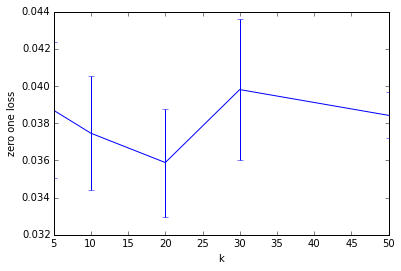

In [17]:
plt.errorbar(parameter, DFresult.T.mean(), yerr = DFresult.T.std())
plt.xlabel("k")
plt.ylabel("zero one loss")
plt.savefig("KNeighbors")

In [73]:
data.T.iloc[1:]

,0,1,2,3,4,5,6,7,8,9,...,12990,12991,12992,12993,12994,12995,12996,12997,12998,12999
上開,4,1,1,4,2,2,NaN,3,1,NaN,...,1,NaN,1,2,3,1,2,NaN,NaN,1
不,47,57,52,48,52,44,44,61,43,51,...,57,53,32,43,38,40,43,38,54,50
之,366,380,406,378,342,356,332,342,402,356,...,402,392,368,356,338,354,394,362,364,364
也,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2,NaN,2,NaN,1,1,1,1,NaN
了,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,1,1,4,2,6,1,3,2,3
云云,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
以,30,44,38,44,31,34,31,40,37,41,...,72,65,68,69,70,78,73,69,56,69
伊,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2,NaN,3,1,NaN,2,NaN,2,2
似,1,NaN,NaN,1,NaN,NaN,NaN,1,1,NaN,...,1,1,2,NaN,2,NaN,NaN,1,NaN,NaN
但,2,4,3,1,6,2,1,3,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
